# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [ ]:
!pip install scikeras

# Additional commands by jmd
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

In [ ]:
# Additional imports by jmd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from keras import Input
#from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [ ]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
df = pd.read_csv(DATA_PATH)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# The columns don't have names, so let's assign them from the documentation
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
             "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
df = pd.read_csv(DATA_PATH, names = col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [ ]:
# Do some exploratory analysis. How many rows/columns are there?
print("Shape of raw data:")
print(df.shape)

# How are NULL values represented?
# Try this ...
print("\nTrying .isnull.sum() ...")
print(df.isnull().sum())
# ... it gives zero for each column, so missing values are NOT represented by NULL

# Use Counter to count each value in a column
print("\nTrying .value_counts() ...")
print(df["workclass"].value_counts())
# Aha! The output contains "?", which is used as the marker for missing data

# What's the percentrage of positive cases in the dataset?
# Get counts of each class (<=50K and >50K)
class_counts = df["class"].value_counts()
print("\nClass counts:")
print(class_counts)
percentage_positive = round(class_counts.values.tolist()[1] / sum(class_counts) * 100, 1)
print(f"Percentage of positive cases: {percentage_positive}")

Shape of raw data:
(32561, 15)

Trying .isnull.sum() ...
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Trying .value_counts() ...
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Class counts:
class
<=50K    24720
>50K      7841
Name: count, dtype: int64
Percentage of positive cases: 24.1


In [ ]:
# Find all NULL values and drop them

# Re-read data with " ?" as missing value marker
# Note that we need a space in " ?" because of the formatting of the file
df = pd.read_csv(DATA_PATH, names = col_names, na_values = [" ?"])
print("\nTrying .isnull.sum() ...")
print(df.isnull().sum())
print("\nTrying .value_counts() ...")
print(df["workclass"].value_counts())

# Drop rows with NA in any column
df = df.dropna(how = "any")
print("\nShape after dropping missing values:")
print(df.shape)


Trying .isnull.sum() ...
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

Trying .value_counts() ...
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Shape after dropping missing values:
(30162, 15)


In [ ]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the encoder with the target labels
le.fit(df["class"])

# View the classes
print(le.classes_)

# Transform the labels
encoded_labels = le.transform(df["class"])
df["class"] = encoded_labels
# Print the value counts to check that "1" is the positive label
print(df["class"].value_counts())

[' <=50K' ' >50K']
class
0    22654
1     7508
Name: count, dtype: int64


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [ ]:
# Split dataset into training and test sets
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

AUC score:
0.5


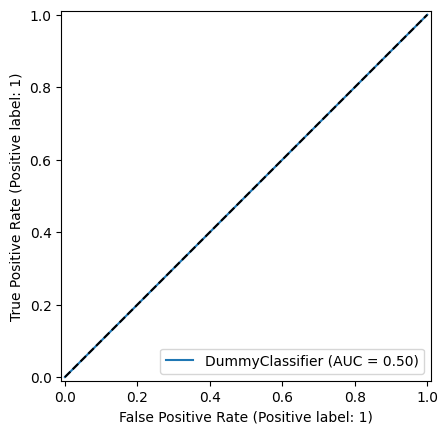

In [ ]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.

# Use DummyClassifier to always predict the majority class
# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train, y_train)
y_proba = dummy_clf.predict_proba(X_test)[:, 1]

# Plot the ROC curve
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html
RocCurveDisplay.from_estimator(dummy_clf, X_test, y_test)
# Add dashed line for "no skill"
# https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Use roc_auc_score to calculate AUC
print("AUC score:")
print(roc_auc_score(y_test, y_proba))

Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [ ]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country.

# Also, apply MinMaxScaler to the remaining continuous features.

categorical_columns = list(X_train.select_dtypes('object').columns)
print("categorical columns:")
print(categorical_columns)
numeric_columns = list(X_train.select_dtypes('int64').columns)
print("numeric columns:")
print(numeric_columns)

ct = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_columns),
    ('num', MinMaxScaler(), numeric_columns),
])

categorical columns:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric columns:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
# How many columns will the dataframe have after these columns transformations are applied?

# Fit and transform the feature values with the ColumnTransformer steps in the pipeline
ct.fit(X_train)
X_train_trf = ct.transform(X_train)
X_test_trf = ct.transform(X_test)
X_train_trf.shape

(22621, 104)

Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [ ]:
# Define the Keras model

def create_model(optimizer = 'adam', activation = 'relu', dropout_rate = 0.0):
  # Instantiate a Sequential model
  model = Sequential()
  # The input shape is determined by the number of features
  model.add(Input(shape = (104, )))
  # Add hidden layer with 50 neurons
  model.add(Dense(50, activation = activation))
  model.add(Dropout(dropout_rate))
  # Add output layer with sigmoid activation function
  model.add(Dense(1, activation = 'sigmoid'))
  # Compile the model with specified optimizer and loss function
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

# Train the model with history callback to get accuracy on train and test data
model = create_model()
history = model.fit(X_train_trf, y_train, epochs = 20, validation_data = (X_test_trf, y_test))

# # Predict on new data
# preds = model.predict(X_test_trf)
# # Look at the predictions
# print(preds)
# # Evaluate the results
# model.evaluate(X_test_trf, y_test)

Epoch 1/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.7829 - loss: 0.4415 - val_accuracy: 0.8445 - val_loss: 0.3449
Epoch 2/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8358 - loss: 0.3483 - val_accuracy: 0.8463 - val_loss: 0.3363
Epoch 3/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8400 - loss: 0.3411 - val_accuracy: 0.8503 - val_loss: 0.3300
Epoch 4/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8450 - loss: 0.3322 - val_accuracy: 0.8520 - val_loss: 0.3268
Epoch 5/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8419 - loss: 0.3306 - val_accuracy: 0.8491 - val_loss: 0.3265
Epoch 6/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8471 - loss: 0.3268 - val_accuracy: 0.8525 - val_loss: 0.3238
Epoch 7/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.3241 - val_accuracy: 0.8517 - val_loss: 0.3218
Epoch 8/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8455 - loss: 0.3225 - val_accuracy:

<Figure size 900x400 with 0 Axes>

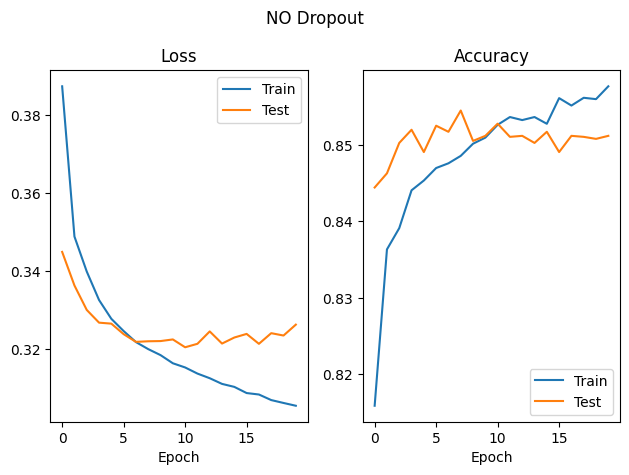

In [ ]:
# Plot loss and accuracy during training

def plot_history(history, suptitle):
  # Set figure size
  plt.figure(figsize = (9, 4))
  # Create subplots
  fig, axs = plt.subplots(1, 2)

  metrics = ['loss', 'accuracy']
  for i in range(2):
    axs[i].plot(history.history[metrics[i]])
    axs[i].plot(history.history[f"val_{metrics[i]}"])
    axs[i].set_xlabel("Epoch")
    axs[i].set_title(metrics[i].title())
    axs[i].legend(["Train", "Test"])

  fig.suptitle(suptitle)
  plt.tight_layout()

plot_history(history, "NO Dropout")

Epoch 1/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.7900 - loss: 0.4455 - val_accuracy: 0.8429 - val_loss: 0.3487
Epoch 2/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8351 - loss: 0.3499 - val_accuracy: 0.8455 - val_loss: 0.3388
Epoch 3/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8367 - loss: 0.3452 - val_accuracy: 0.8475 - val_loss: 0.3331
Epoch 4/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.3413 - val_accuracy: 0.8513 - val_loss: 0.3299
Epoch 5/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8488 - loss: 0.3317 - val_accuracy: 0.8535 - val_loss: 0.3261
Epoch 6/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8461 - loss: 0.3301 - val_accuracy: 0.8499 - val_loss: 0.3251
Epoch 7/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.3205 - val_accuracy: 0.8528 - val_loss: 0.3226
Epoch 8/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8458 - loss: 0.3221 - val_accuracy: 

<Figure size 900x400 with 0 Axes>

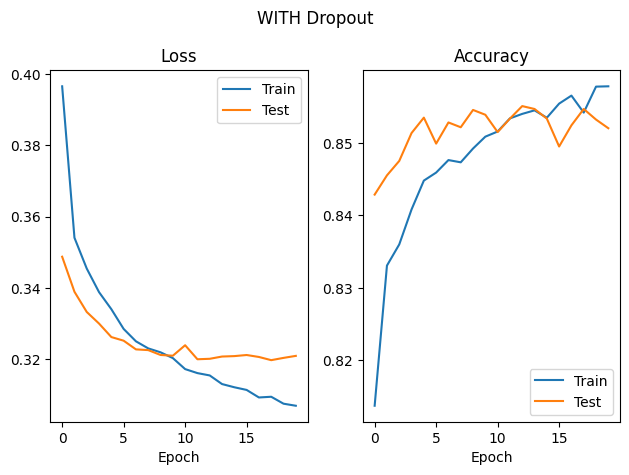

In [ ]:
# Add dropout and train the model
model = create_model(dropout_rate = 0.2)
history = model.fit(X_train_trf, y_train, epochs = 20, validation_data = (X_test_trf, y_test))
plot_history(history, "WITH Dropout")

Epoch 1/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7821 - loss: 0.4457 - val_accuracy: 0.8423 - val_loss: 0.3477
Epoch 2/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8293 - loss: 0.3581 - val_accuracy: 0.8454 - val_loss: 0.3412
Epoch 3/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8350 - loss: 0.3519 - val_accuracy: 0.8427 - val_loss: 0.3399
Epoch 4/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8410 - loss: 0.3365 - val_accuracy: 0.8515 - val_loss: 0.3306
Epoch 5/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8389 - loss: 0.3397 - val_accuracy: 0.8512 - val_loss: 0.3268
Epoch 6/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8452 - loss: 0.3284 - val_accuracy: 0.8499 - val_loss: 0.3247
Epoch 7/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8476 - loss: 0.3252 - val_accuracy: 0.8531 - val_loss: 0.3226
Epoch 8/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8494 - loss: 0.3192 - val_accuracy: 

<Figure size 900x400 with 0 Axes>

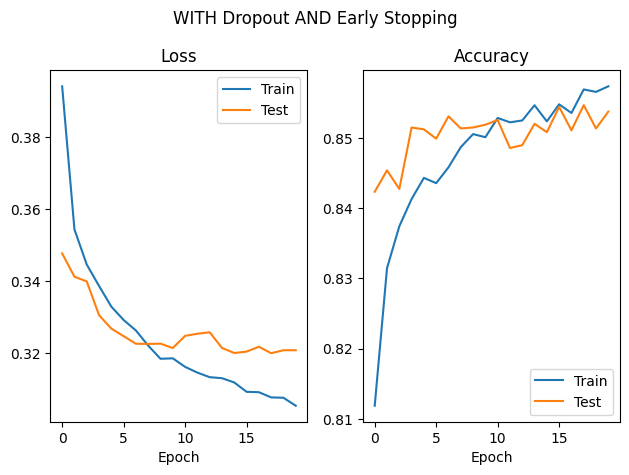

In [ ]:
# Add dropout and train the model with early stopping
model = create_model(dropout_rate = 0.2)
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor = "val_loss", patience = 5)
# Train the model with the callback (passed as list to the callbacks parameter)
history = model.fit(X_train_trf, y_train, epochs = 20, validation_data = (X_test_trf, y_test), callbacks = [early_stopping])
plot_history(history, "WITH Dropout AND Early Stopping")

In [ ]:
# Create a Keras classifier

early_stopping = EarlyStopping(monitor = "val_loss", patience = 5)
# Put the early_stopping callback here, not in pipeline.fit()
# https://stackoverflow.com/questions/42492824/can-i-send-callbacks-to-a-kerasclassifier
clf = KerasClassifier(build_fn = create_model, dropout_rate = 0.2, callbacks = [early_stopping], epochs = 20)
# Syntax for validation data from: https://github.com/adriangb/scikeras/issues/131
# Here we need to use the *transformed* data, because it's not sent through the pipeline
clf.set_params(fit__validation_data = (X_test_trf, y_test))

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7af613defba0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7af60876a410>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	dropout_rate=0.2
	class_weight=None
	fit__validation_data=(<7541x104 sparse matrix of type '<class 'numpy.float64'>'
	with 91376 stored elements in Compressed Sparse Row format>,        class
12488      1
5130       0
8616       0
15453      1
13555      1
...      ...
20405      0
2745       0
31955      0
10968      0
15174      0

[7541 rows x 1 columns])
)

In [ ]:
# Create the scikit-learn pipeline

pipeline = Pipeline([
  # The column transformers
  ('ct', ct),
  # The estimator (Keras classifier)
  ('clf', clf),
])
pipeline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('clf',
                 KerasClassifier(build_fn=<function create_model at 0x7af613defba0>, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7af60876a410>], dropout_rate=0.2, epochs=20, fit__validation_data=(<7541x104 sparse matrix of type '<class 'numpy.float64'>'
	with 91376 stored elements in Compressed Sparse Row format>,        class
12488      1
5130       0
8616       0
15453      1
13555      1
...      ...
20405      0
2745       0
31955      0
10968      0
15174      0

[7541 rows x 1 columns])))])

In [ ]:
# Fit the pipeline on the training data

pipeline.fit(X_train, y_train)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


707/707 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7761 - loss: 0.4604 - val_accuracy: 0.8401 - val_loss: 0.3517
Epoch 2/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8355 - loss: 0.3541 - val_accuracy: 0.8451 - val_loss: 0.3402
Epoch 3/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8343 - loss: 0.3529 - val_accuracy: 0.8463 - val_loss: 0.3327
Epoch 4/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8439 - loss: 0.3344 - val_accuracy: 0.8506 - val_loss: 0.3300
Epoch 5/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8446 - loss: 0.3301 - val_accuracy: 0.8512 - val_loss: 0.3255
Epoch 6/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8408 - loss: 0.3351 - val_accuracy: 0.8500 - val_loss: 0.3236
Epoch 7/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8471 - loss: 0.3244 - val_accuracy: 0.8527 - val_loss: 0.3218
Epoch 8/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8503 - loss: 0.3164 - val_accuracy: 0.8524 - va

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('clf',
                 KerasClassifier(build_fn=<function create_model at 0x7af613defba0>, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7af60876a410>], dropout_rate=0.2, epochs=20, fit__validation_data=(<7541x104 sparse matrix of type '<class 'numpy.float64'>'
	with 91376 stored elements in Compressed Sparse Row format>,        class
12488      1
5130       0
8616       0
15453      1
13555      1
...      ...
20405      0
2745       0
31955      0
10968      0
15174      0

[7541 rows x 1 columns])))])

In [ ]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?

# y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]
# Use roc_auc_score to calculate AUC
print("AUC score:")
print(roc_auc_score(y_test, y_proba))

236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
AUC score:
0.9100350209507829


236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


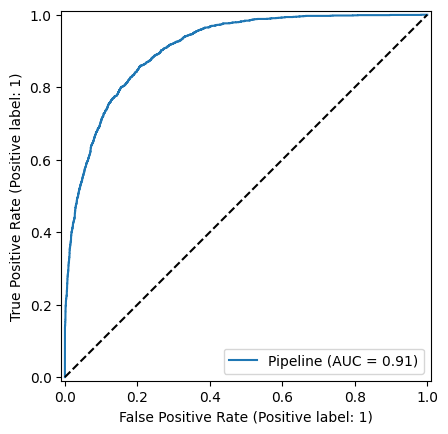

In [ ]:
# Generate an ROC curve for your model.

# Plot the ROC curve
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
# Add dashed line for "no skill"
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Write-up by Jeffrey Dick, 2025-01-24
#### Edited on 2025-02-14 with note about .predict_proba(X_test).

## Data loading
- Added column names from the documentation (http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

## Data exploration
- The dataset has 32561 rows and 15 columns. NOTE: this is less than the total number of 48842 instances described in the documentation.
- Missing values are encoded by the value " ?". NOTE: a space is required before ? because of the formatting of the data file.
- The number of positive cases (income >50K) is 7508, or 24.9 percent.

## Data cleaning
- The columns with NA values are workclass (1836), occupation (1843), and native_country (583).
- 30162 rows remain after dropping rows with a missing value in any column.

## Label encoding and train-test split
- After binary encoding, 1 is used for the positive label (income >50K).
- 25% of the data was used for the test fold with `random_state` set for reproducibility.

## Baseline ROC and AUC
- A dummy classifier was implemented using the majority class.
- The ROC visualization shows a straight line from (0,0) to (1,1).
- This corresponds to an AUC of 0.5, which means that the dummy classifier is no better than random guess.

## Feature engineering
- One-hot encoding of the categorical variables results in a DataFrame with 104 columns, much more than the 14 features in the original dataset.

## Model building

- I built a simple model with a hidden dense layer with 50 neurons.
- For binary classification, the output layer has one neuron with sigmoid activation.
- For binary classification, binary cross-entropy is a useful loss function.

## Initial testing
- I started with 5 epochs, but this wasn't enough for the model to converge. Ultimately, I choose to train the model for a maximum of 20 epochs.
- The loss and accuracy curves diverge for the training and test data, indicating overfitting.
- Adding a dropout layer reduces but does not eliminate the overfitting.
- Therefore, I added an early stopping callback that activates during model fitting.
- Early stopping causes the model training to stop after 18 or 19 epochs.

## Keras Classifier and scikit-learn pipeline
- The KerasClassifier instance is created with the EarlyStopping callback.
- The pipeline combines the ColumnTransformer and KerasClassifier instances.
- The pipeline is fit on the *untransformed* data (because the transformation is performed as part of the pipeline).

## Model accuracy, AUC and ROC
- The accuracy of the predictions is around 0.85.
- The AUC of the model is around 0.77.
- The ROC curve shows much better performance compared to random guessing.
  - *Note: make sure to use `.predict_proba(X_test)` rather than `.predict(X_test)` to calculate AUC score correctly with `roc_auc_score()`.*

## Reproducibility and debugging
- Although `random_seed` was set for the train-test split, the deep learning model produces slightly different results across runs.
  - This is not a major issue, but it makes reporting numerical results (accuracy, AUC, etc.) difficult.
  - See this website for methods to build reproducible models: https://keras.io/examples/keras_recipes/reproducibility_recipes/
- The DataCamp Keras course used the `input_shape` parameter to specify the input for the first Dense() layer:
  - `model.add(Dense(50, input_shape = (104, ), activation = 'relu'))`
  - But this gives a warning:
    - UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  - Therefore, the Input() function is imported and used to build the input layer.
- pipeline.fit() produced an error:
  - AttributeError: 'super' object has no attribute '__sklearn_tags__'
  - This seems to be related to version incompatibility for scikit-learn: https://stackoverflow.com/questions/79290968/super-object-has-no-attribute-sklearn-tags
  - Therefore, scikit-learn 1.5.2 was installed here.